In [47]:
import pandas as pd
import numpy as np

In [48]:
triang = {
    "CANDELARIA": ['SANTA FE'],
    "RAFAEL URIBE URIBE": ['TUNJUELITO', 'SAN CRISTOBAL'],
    "ANTONIO NARIÑO": ["PUENTE ARANDA", 'SAN CRISTOBAL', 'SANTA FE'],
    "LOS MARTIRES": ["PUENTE ARANDA", "SANTA FE"],
    "TEUSAQUILLO": ["BARRIOS UNIDOS", "ENGATIVA", "FONTIBON", "PUENTE ARANDA"],
    "CHAPINERO": ["BARRIOS UNIDOS", "USAQUEN", "SANTA FE"]

}

In [49]:
df = pd.read_csv('Datos_PowerBI/SISAIRE-MODIFIED-COMPLETE-IMPUTED-FIXED.csv', sep=';', decimal=',')
df.head()

,Estacion,Localidad,Fecha,Año,CO,NO2,O3,PM10,PM25,SO2
0,USME,USME,2020-12-31 22:00:00,2020,1259.39,44.00136,2.3544,39.5,24.0,16.23532
1,USME,USME,2020-12-31 21:00:00,2020,801.43,40.99272,2.5506,35.5,28.8,17.80648
2,USME,USME,2020-12-31 20:00:00,2020,1144.90,45.31764,2.7468,38.3,21.8,13.61672
3,USME,USME,2020-12-31 19:00:00,2020,686.94,40.61664,6.4746,34.7,17.1,7.07022
4,USME,USME,2020-12-31 18:00:00,2020,1488.37,75.96816,0.9810,38.7,10.6,4.97534


In [50]:

df['Estacion'] = (
    df['Estacion']
      .str.upper()
      .str.normalize('NFKD')
      .str.encode('ascii', errors='ignore')
      .str.decode('utf-8')
)

In [51]:
df['Estacion'].unique()

array(['USME', 'BOLIVIA', 'BOSA', 'CARVAJAL - SEVILLANA', 'CDAR',
       'CIUDAD BOLIVAR', 'EL JAZMIN', 'KENNEDY', 'LAS FERIAS',
       'MINAMBIENTE', 'PUENTE ARANDA', 'SUBA', 'TUNAL', 'USAQUEN',
       'GUAYMARAL', 'SAN CRISTOBAL', 'COLINA', 'MOVIL FONTIBON',
       'P_CAMI - FONTIBON'], dtype=object)

In [52]:

df['Localidad'] = (
    df['Localidad']
      .str.upper()
      .str.normalize('NFKD')
      .str.encode('ascii', errors='ignore')
      .str.decode('utf-8')
)

In [53]:
df.head()

,Estacion,Localidad,Fecha,Año,CO,NO2,O3,PM10,PM25,SO2
0,USME,USME,2020-12-31 22:00:00,2020,1259.39,44.00136,2.3544,39.5,24.0,16.23532
1,USME,USME,2020-12-31 21:00:00,2020,801.43,40.99272,2.5506,35.5,28.8,17.80648
2,USME,USME,2020-12-31 20:00:00,2020,1144.90,45.31764,2.7468,38.3,21.8,13.61672
3,USME,USME,2020-12-31 19:00:00,2020,686.94,40.61664,6.4746,34.7,17.1,7.07022
4,USME,USME,2020-12-31 18:00:00,2020,1488.37,75.96816,0.9810,38.7,10.6,4.97534


In [54]:
localidades = {
    'BOGOTA RURAL - MOCHUELO':'FONTIBON',
    'BOLIVIA': 'ENGATIVA',
    'BOSA':'BOSA',
    'CARVAJAL - SEVILLANA': 'KENNEDY',
    'CDAR':'BARRIOS UNIDOS',
    'CIUDAD BOLIVAR': 'CIUDAD BOLIVAR',
    'COLINA':"SUBA",
    'FONTIBON': 'FONTIBON',
    'GUAYMARAL': 'SUBA',
    'EL JAZMIN': 'PUENTE ARANDA',
    'JAZMIN': 'PUENTE ARANDA',
    'KENNEDY': 'KENNEDY',
    'LAS FERIAS': 'ENGATIVA',
    'MINAMBIENTE':'SANTA FE',
    'MOCHUELO - COLEGIO':'CIUDAD BOLIVAR',
    'MOVIL 7MA': 'CHAPINERO',
    'MOVIL FONTIBON':'FONTIBON',
    'P_CAMI - FONTIBON':'FONTIBON',
    'PUENTE ARANDA': 'PUENTE ARANDA',
    'SAN CRISTOBAL': 'SAN CRISTOBAL',
    'SUBA': 'SUBA',
    'TUNAL': 'TUNJUELITO',
    'USAQUEN': 'USAQUEN', 
    'USME': 'USME'
}
print(len(localidades))

24


In [55]:
ubicacion_geo = {
    'Estacion':['USME', 'BOLIVIA', 'BOSA', 'CARVAJAL - SEVILLANA', 'CDAR',
       'CIUDAD BOLIVAR', 'EL JAZMIN', 'KENNEDY', 'LAS FERIAS',
       'MINAMBIENTE', 'PUENTE ARANDA', 'SUBA','TUNAL', 'USAQUEN',
       'GUAYMARAL', 'SAN CRISTOBAL', 'COLINA', 'MOVIL FONTIBON',
       'P_CAMI - FONTIBON', 
       'BOGOTA RURAL - MOCHUELO', 'FONTIBON', 'JAZMIN', 'MOCHUELO - COLEGIO',  'MOVIL 7MA'
       ],
    'Latitud':[
        4.532, 4.7358 , 4.6056, 4.5958, 4.658466,4.5778,4.6085,4.62505,4.6907,
        4.625486,4.63176,4.761247,4.576225, 4.71035, 4.78375, 4.57255, 4.737194,4.6680, 4.63176,
        4.6906042, 4.63176,4.6085, 4.69060, 4.6451944
    ],
    'Longitud':[
        -74.11706,-74.12589, -74.2041, -74.1485, -74.08396, -74.16627,-74.11494,-74.16133, -74.082483,
        -74.06698, -74.117483, -74.09346,-74.130955, -74.030416, -74.044138, -74.0838138, -74.069472, -74.14850, -74.1174833,
        -74.0404989, -74.1174833, -74.11494, -74.0404989, -74.06155

    ]
}
nuevas = {
    'Localidad': ["CANDELARIA", "RAFAEL URIBE URIBE", "ANTONIO NARIÑO",
        "LOS MARTIRES", "TEUSAQUILLO", "CHAPINERO"
       ],
    'Latitud':[4.5778, 4.5729, 4.5936, 4.80782, 4.64439, 4.649723   ],
    'Longitud':[-74.156974, -74.11319, -74.106871, -74.08576, -74.085605, -74.04479 ]
}

new_localidades = pd.DataFrame(nuevas)
ubicacion = pd.DataFrame(ubicacion_geo)
ubicacion.head(5)

,Estacion,Latitud,Longitud
0,USME,4.532000,-74.11706
1,BOLIVIA,4.735800,-74.12589
2,BOSA,4.605600,-74.20410
3,CARVAJAL - SEVILLANA,4.595800,-74.14850
4,CDAR,4.658466,-74.08396


In [56]:
new_localidades.head()

,Localidad,Latitud,Longitud
0,CANDELARIA,4.57780,-74.156974
1,RAFAEL URIBE URIBE,4.57290,-74.113190
2,ANTONIO NARIÑO,4.59360,-74.106871
3,LOS MARTIRES,4.80782,-74.085760
4,TEUSAQUILLO,4.64439,-74.085605


In [57]:
ubicacion.shape

(24, 3)

In [58]:
# --- Ejemplo base de tus dataframes ---
# df_datos = pd.read_csv("datos_contaminantes.csv")
# df_coords_estaciones = pd.read_csv("coords_estaciones.csv")
# df_coords_nuevas = pd.read_csv("coords_nuevas.csv")

# --- 1️⃣ Unir coordenadas a las estaciones ---
df = pd.merge(df, ubicacion, on='Estacion', how='left')

# --- 2️⃣ Función IDW general ---
def idw(lat0, lon0, df, contaminante, power=2, k=3):
    df_valid = df.dropna(subset=[contaminante]).copy()

    df_valid["dist"] = np.sqrt(
        (df_valid["Latitud"] - lat0)**2 + (df_valid["Longitud"] - lon0)**2
    )

    df_valid = df_valid.nsmallest(k, "dist")
    df_valid["dist"] = df_valid["dist"].replace(0, 1e-6)

    weights = 1 / (df_valid["dist"] ** power)
    return np.sum(weights * df_valid[contaminante]) / np.sum(weights)

# --- 3️⃣ Aplicar a todas las nuevas localidades ---




In [59]:
resultados = []

fechas = df["Fecha"].unique()

contaminantes = ['CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']

for fecha in fechas:
    df_fecha = df[df["Fecha"] == fecha]

    for _, nueva in new_localidades.iterrows():
        localidad = nueva["Localidad"]
        lat0, lon0 = nueva["Latitud"], nueva["Longitud"]

        fila = {
            "Estacion": localidad,    # mismo nombre que la localidad
            "Localidad": localidad,   # localidad también
            "Fecha": fecha,
            "Año": pd.to_datetime(fecha).year
        }

        for contaminante in contaminantes:
            fila[contaminante] = idw(lat0, lon0, df_fecha, contaminante)

        resultados.append(fila)

df_estimaciones = pd.DataFrame(resultados)

C:\Users\laura\AppData\Local\Temp\ipykernel_1840\748847879.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(weights * df_valid[contaminante]) / np.sum(weights)
C:\Users\laura\AppData\Local\Temp\ipykernel_1840\748847879.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(weights * df_valid[contaminante]) / np.sum(weights)
C:\Users\laura\AppData\Local\Temp\ipykernel_1840\748847879.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(weights * df_valid[contaminante]) / np.sum(weights)
C:\Users\laura\AppData\Local\Temp\ipykernel_1840\748847879.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(weights * df_valid[contaminante]) / np.sum(weights)
C:\Users\laura\AppData\Local\Temp\ipykernel_1840\748847879.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(weights * df_valid[contaminante]) / np.sum(weights)
C:\Users\laura\AppData\Local\Temp\i

In [61]:
df_estimaciones.head(50)

,Estacion,Localidad,Fecha,Año,CO,NO2,O3,PM10,PM25,SO2
0,CANDELARIA,CANDELARIA,2020-12-31 22:00:00,2020,1344.145118,41.162362,6.201627,56.588982,35.609643,6.751808
1,RAFAEL URIBE URIBE,RAFAEL URIBE URIBE,2020-12-31 22:00:00,2020,1191.658809,35.079500,4.367707,50.019317,32.934619,6.787047
2,ANTONIO NARIÑO,ANTONIO NARIÑO,2020-12-31 22:00:00,2020,1117.652004,39.306824,2.806826,47.681850,31.173207,3.959282
3,LOS MARTIRES,LOS MARTIRES,2020-12-31 22:00:00,2020,525.561750,20.847297,17.157415,29.631282,19.196664,1.676995
4,TEUSAQUILLO,TEUSAQUILLO,2020-12-31 22:00:00,2020,1001.499051,34.704903,5.234656,31.811951,30.361847,3.074898
5,CHAPINERO,CHAPINERO,2020-12-31 22:00:00,2020,572.450000,32.534385,9.664817,23.946026,21.313736,2.499121
6,CANDELARIA,CANDELARIA,2020-12-31 21:00:00,2020,1836.989368,50.559161,2.596779,68.731769,42.400057,5.923832
7,RAFAEL URIBE URIBE,RAFAEL URIBE URIBE,2020-12-31 21:00:00,2020,1473.649273,42.525714,3.492194,58.224037,28.125401,6.635639
8,ANTONIO NARIÑO,ANTONIO NARIÑO,2020-12-31 21:00:00,2020,1469.342020,52.840504,2.228568,46.940921,34.286824,3.878030
9,LOS MARTIRES,LOS MARTIRES,2020-12-31 21:00:00,2020,641.482524,25.588456,18.841981,39.826486,28.776665,1.249394


In [70]:
df_estimaciones.to_csv("Datos_PowerBI/datos_solo_triangulacion.csv", sep=';', decimal=',', index=False)

In [62]:
df_total = pd.concat([df, df_estimaciones], ignore_index=True)
df_total = df_total.sort_values(by=["Fecha", "Localidad"])
df_total.to_csv("Datos_PowerBI/datos_completos_con_interpolacion.csv", sep=';', decimal=',')

In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# === 1. Cargar datasets ===
aire = pd.read_csv(r"Datos_PowerBI/datos_completos_con_interpolacion.csv", sep=';', decimal=",")
sintomas = pd.read_csv(r"datos_ninos/obs_aire_menores5anos.csv", sep=';', decimal=",",encoding='ISO8859-1')

In [81]:
sintomas = sintomas.rename(columns={'Año encuesta': 'Año'})
sintomas['Localidad'] = (
    sintomas['Localidad']
      .str.upper()
      .str.normalize('NFKD')
      .str.encode('ascii', errors='ignore')
      .str.decode('utf-8')
)
sintomas.head()

,Año,Localidad,Sexo,Aseguramiento,Estrato,Casos de sibilancia último año,Casos de tos último año diferente gripa,Casos de mocos o nariz tapada último año,Casos de ausentismo escolar,Casos de asistencia al colegio,Registros
0,2019,ANTONIO NARINO,Hombre,Contributivo (EPS),2,0,0,0,0,1,1
1,2019,ANTONIO NARINO,Hombre,Contributivo (EPS),3,2,4,2,6,12,27
2,2019,ANTONIO NARINO,Hombre,Ninguno,3,0,0,1,0,0,2
3,2019,ANTONIO NARINO,Hombre,Régimen excepcional,3,0,0,0,0,0,1
4,2019,ANTONIO NARINO,Hombre,Subsidiado (EPSS),3,0,4,1,4,6,12


In [83]:
aire['Localidad'] = (
    aire['Localidad']
      .str.upper()
      .str.normalize('NFKD')
      .str.encode('ascii', errors='ignore')
      .str.decode('utf-8')
)
#aire = aire.drop(columns=['Latitud', 'Longitud', 'Unnamed: 0'])
aire.head()

,Estacion,Localidad,Fecha,Año,CO,NO2,O3,PM10,PM25,SO2
0,ANTONIO NARIÑO,ANTONIO NARINO,2020-01-01 01:00:00,2020,371.543649,23.571106,14.214449,46.937984,39.243602,1.624660
1,CDAR,BARRIOS UNIDOS,2020-01-01 01:00:00,2020,1144.900000,18.804000,17.069400,8.300000,8.000000,1.309300
2,CANDELARIA,CANDELARIA,2020-01-01 01:00:00,2020,442.922959,31.631491,19.734890,41.763258,56.704934,1.315912
3,CHAPINERO,CHAPINERO,2020-01-01 01:00:00,2020,885.784991,21.967158,14.201956,17.724889,25.456865,1.379125
4,LAS FERIAS,ENGATIVA,2020-01-01 01:00:00,2020,686.940000,31.778760,9.810000,23.548148,65.000000,NaN


In [ ]:
# 1. Merge
df_merged = pd.merge(aire, sintomas, on=["Año", "Localidad"], how="inner")

# 2. Filtrar numéricos
df_corr = df_merged.select_dtypes(include=["float64", "int64"])

# 3. Correlación
matriz_corr = df_corr.corr(method='pearson')

# 4. Correlación contaminantes ↔ síntomas
corr_tos = matriz_corr["Casos de sibilancia último año"].sort_values(ascending=False)
print(corr_tos)


Casos de sibilancia último año              1.000000
Casos de tos último año diferente gripa     0.815550
Casos de mocos o nariz tapada último año    0.767585
Casos de ausentismo escolar                 0.760961
Casos de asistencia al colegio              0.693083
Registros                                   0.680999
Año                                         0.114435
SO2                                         0.021411
PM10                                        0.002555
PM25                                       -0.008760
NO2                                        -0.020129
O3                                         -0.024122
CO                                         -0.057986
Estrato                                    -0.130972
Name: Casos de sibilancia último año, dtype: float64


In [91]:
corr_tos = matriz_corr["Casos de tos último año diferente gripa"].sort_values(ascending=False)
print(corr_tos)


Casos de tos último año diferente gripa     1.000000
Casos de sibilancia último año              0.815550
Casos de ausentismo escolar                 0.813610
Casos de mocos o nariz tapada último año    0.677924
Casos de asistencia al colegio              0.570322
Registros                                   0.563044
Año                                         0.204659
SO2                                        -0.011578
O3                                         -0.034964
PM10                                       -0.046725
PM25                                       -0.054753
NO2                                        -0.055272
CO                                         -0.097911
Estrato                                    -0.110120
Name: Casos de tos último año diferente gripa, dtype: float64


In [92]:
corr_tos = matriz_corr["Casos de mocos o nariz tapada último año"].sort_values(ascending=False)
print(corr_tos)

Casos de mocos o nariz tapada último año    1.000000
Casos de asistencia al colegio              0.838179
Registros                                   0.835559
Casos de sibilancia último año              0.767585
Casos de tos último año diferente gripa     0.677924
Casos de ausentismo escolar                 0.626969
Año                                         0.118426
PM10                                        0.059063
SO2                                         0.052620
PM25                                        0.025979
NO2                                         0.019558
CO                                          0.008860
O3                                         -0.028971
Estrato                                    -0.110554
Name: Casos de mocos o nariz tapada último año, dtype: float64


In [85]:
import matplotlib.pyplot as plt

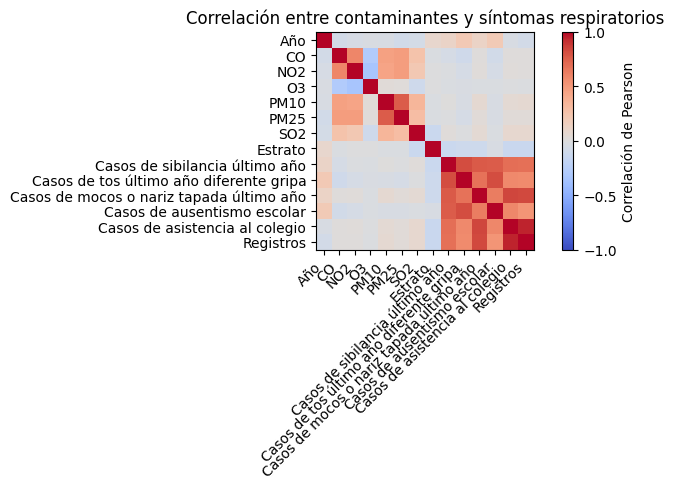

In [87]:
plt.figure(figsize=(8,5))
plt.imshow(matriz_corr, cmap='coolwarm', vmin=-1, vmax=1)

# Agregar nombres de columnas como labels
plt.xticks(ticks=range(len(matriz_corr.columns)), labels=matriz_corr.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(matriz_corr.index)), labels=matriz_corr.index)

plt.colorbar(label='Correlación de Pearson')
plt.title('Correlación entre contaminantes y síntomas respiratorios')

plt.tight_layout()
plt.show()


In [76]:


# === 2. Definir columnas ===
cols_air = ["CO", "NO2", "O3", "PM10", "PM25", "SO2"]
cols_sym_raw = ["Casos de sibilancia último año", "Casos de tos último año diferente gripa", "Casos de mocos o nariz tapada último año", "Registros"]

# === 3. Convertir solo columnas existentes en cada dataset ===
for df, cols in [(aire, cols_air), (sintomas, cols_sym_raw)]:
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

# === 4. Verificar columnas comunes para hacer el merge ===
if not {"Año", "Localidad"}.issubset(aire.columns) or not {"Año", "Localidad"}.issubset(sintomas.columns):
    raise ValueError("❌ Las columnas 'Año' y 'Localidad' deben existir en ambos archivos.")

# === 5. Unir datasets ===
merged = pd.merge(aire, sintomas, on=["Año", "Localidad"], how="inner")

# === 6. Calcular prevalencias ==
merged["Prevalencia_sibilancias"] = merged["Casos de sibilancia último año"] / merged["Registros"]
merged["Prevalencia_tos"] = merged["Casos de tos último año diferente gripa"] / merged["Registros"]
merged["Prevalencia_mocos"] = merged["Casos de mocos o nariz tapada último año"] / merged["Registros"]



cols_sym = ["Prevalencia_sibilancias", "Prevalencia_tos", "Prevalencia_mocos"]

# === 7. Calcular correlaciones por localidad y año ===
corr_list = []

for (loc, anio), group in merged.groupby(["Localidad", "Año"]):
    # Verifica que haya al menos 2 filas válidas
    if len(group) >= 2:
        # Escalado dentro del grupo
        scaler = MinMaxScaler()
        scaled = group.copy()
        scaled[cols_air + cols_sym] = scaler.fit_transform(group[cols_air + cols_sym])

        # Calcular correlación aire vs síntomas
        corr_matrix = scaled[cols_air + cols_sym].corr(method='pearson')
        corr_subset = corr_matrix.loc[cols_air, cols_sym].reset_index()
        corr_subset = corr_subset.melt(id_vars="index", var_name="Sintoma", value_name="Correlacion")
        corr_subset["Localidad"] = loc
        corr_subset["Año"] = anio
        corr_subset.rename(columns={"index": "Contaminante"}, inplace=True)
        corr_list.append(corr_subset)

# === 8. Concatenar resultados ===
if len(corr_list) == 0:
    print("⚠️ No se pudo calcular ninguna correlación (quizás hay pocos datos por grupo).")
else:
    corr_df = pd.concat(corr_list, ignore_index=True)
    #corr_df.to_csv("correlacion_localidad_anio.csv", index=False, sep=";", decimal=",")
    print("✅ Archivo 'correlacion_localidad_anio.csv' generado correctamente.")
    print(corr_df.head())


⚠️ No se pudo calcular ninguna correlación (quizás hay pocos datos por grupo).
